<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre6/Exercise5bis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 6.5bis

## On importe les bibliothèques

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Définition des constantes

In [0]:
R = 8.314
Ea = 65700 # J/mol
T0 = 310 # K
Tj = 310 # K
CA0 = 9.3 # kmol/m3
FA0 = 16.3 * 0.9 # kmol/h
FAI = 16.3 * 0.1 # kmol/h
FB0 = 0 # kmol/h
Delta_HR = -6900 # J/(mole de butane)
cp_A = 141 # J/mol*K
cp_B = 141 # J/mol*K
cp_I = 161 # J/mol*K
Ua = 5000 # kJ/m3*h*K
k1 = 31.1 # 1/h
Kc2 = 3.03 # -
T1 = 360 # K
T2 = 333 # K
cp_0 = cp_A + 0.1/0.9 * cp_I # J/mol*K

## Définition des bilans

In [0]:
def bilans(variables, V):
    FA, FB, T = variables
    
    k = k1 * np.exp(Ea/R * (1/T1 - 1/T))
    Kc = Kc2 * np.exp(Delta_HR/R * (1/T2 - 1/T))
    
    X = 1 - FA/FA0
    
    CA = CA0 * (1 - X)
    CB = CA0 * X
    
    r1 = k * CA
    r2 = k/Kc * CB
    
    RA = -r1 + r2
    RB = r1 - r2
    
    dFA = RA
    dFB = RB
    dT = (Ua * (Tj - T) + (-Delta_HR) * r1 + Delta_HR * r2) / FA0 / cp_0
    
    return [dFA, dFB, dT]

    

## Initial conditions and integration range

In [0]:
variables0 = [FA0, FB0, T0]

In [0]:
V = np.arange(0, 6.001, 0.001)

In [0]:
results = odeint(
    bilans,
    variables0,
    V
)

In [0]:
FA = results[:,0]
FB = results[:,1]
T = results[:,2]

X = 1 - FA / FA0

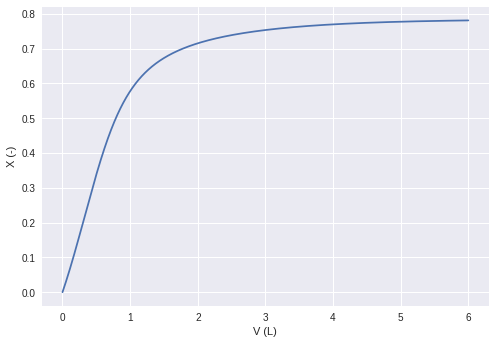

In [8]:
plt.plot(V, X)
plt.xlabel('V (L)')
plt.ylabel('X (-)')
plt.show()

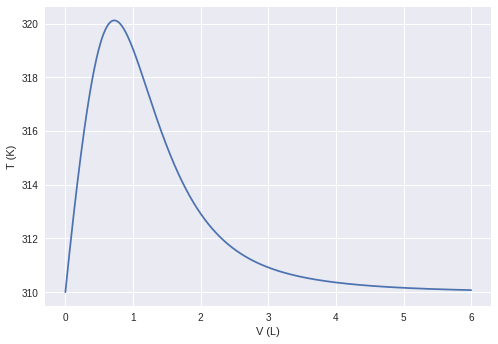

In [9]:
plt.plot(V, T)
plt.xlabel('V (L)')
plt.ylabel('T (K)')
plt.show()